In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

## In this assignment, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:

* Use a pre-built implementation of regression to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a pre-built implementation of regression to run polynomial regression, this time with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.

In [50]:
import pandas as pd

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features. When fitting the model, use an L2 penalty of 1.5e-5:

In [51]:
l2_small_penalty = 1.5e-5

In [52]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x:x**power)
    return poly_dataframe

When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results. Thus, rather than using no regularization, we will introduce a tiny amount of regularization (l2_penalty=1.5e-5) to make the solution numerically stable

In [53]:
#With the L2, fit the model and print out the learned weights
from sklearn import linear_model

poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
my_features = list(poly15_data.columns)
poly15_data['price'] = sales['price']

model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(np.asanyarray(poly15_data[my_features]),
                  np.asanyarray(poly15_data[['price']]))

print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[  1.24873306e+02  -4.77376011e-02   3.01446238e-05  -2.44419942e-09
   -1.94153675e-13   8.54085686e-18   1.51142121e-21   8.27979094e-26
    6.52603100e-31  -3.27895017e-34  -3.87962315e-38  -2.72437650e-42
   -1.07790800e-46   3.78242694e-51   1.39790296e-54]]
Intercept:  [ 220664.37505311]


In [54]:
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
19452,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36,142000.0
15381,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38,276000.0
860,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38,245000.0
18379,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38,265000.0
4868,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38,228000.0


# Observe Overfitting

Recall from Module 3 (Polynomial Regression) that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Module 3.

In [55]:
# download the provided csv files for each subset and load them
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

Just as we did in Module 3 (Polynomial Regression), fit a 15th degree polynomial on each of the 4 sets, plot the results and view the weights for the four models. This time, set 

l2_small_penalty=1e-9

In [56]:
l2_small_penalty=1e-9

In [57]:
def set_poly15_data(set_df, l2_small_penalty):
    poly15_data = polynomial_dataframe(set_df['sqft_living'], 15) # use equivalent of `polynomial_dframe`
    model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
    model.fit(poly15_data, set_df['price'])

    plt.scatter(poly15_data.power_15, set_df.price, color = 'blue')
    plt.plot(poly15_data, model.predict(poly15_data),'-r')
    plt.xlabel("Square Feet")
    plt.ylabel("Price")
    print ('Coefficients: ', model.coef_)
    print ('Intercept: ',model.intercept_)

Coefficients:  [  5.44669390e+02  -3.55447596e-01   1.22446377e-04  -1.17175306e-08
  -3.90512491e-13  -1.39076430e-17   1.47860317e-20   6.87491797e-25
  -7.57204088e-29  -1.04097291e-32  -3.71844322e-37   3.39989425e-41
   5.56592036e-45   2.53761358e-49  -3.35152911e-53]
Intercept:  23888.8286299


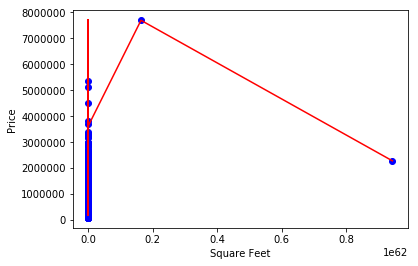

In [58]:
set_poly15_data(set_1,1e-9)

Coefficients:  [  8.59362667e+02  -8.18118300e-01   4.28879996e-04  -9.12770690e-08
  -2.69604430e-12   3.73980329e-15  -1.42711929e-19  -6.30794700e-23
  -1.44559582e-27   7.44321382e-31   9.25865793e-35   3.28006663e-41
  -1.29543494e-42  -1.38781261e-46   1.66546444e-50]
Intercept:  -55614.6459415


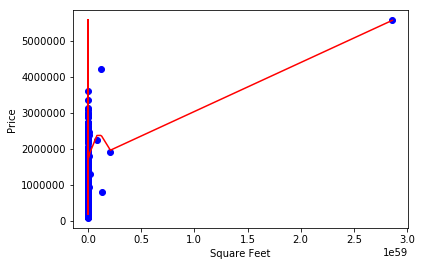

In [59]:
set_poly15_data(set_2,1e-9)

Coefficients:  [ -7.55395960e+02   9.75579534e-01  -4.58945999e-04   7.77958081e-08
   7.15013469e-12  -2.88601996e-15  -2.13678055e-20   3.38085236e-23
   2.19178212e-27  -1.97067807e-31  -4.15993167e-35  -1.80196182e-39
   3.19071179e-43   5.08456919e-47  -3.93304270e-51]
Intercept:  470987.874264


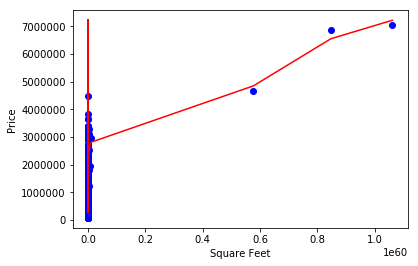

In [60]:
set_poly15_data(set_3,1e-9)

Coefficients:  [  1.11944570e+03  -9.83760193e-01   3.38770885e-04   3.60377237e-08
  -4.37814013e-11   5.77191657e-15   7.66795260e-19  -9.49297595e-23
  -1.96030840e-26  -2.10879012e-32   3.31005056e-34   3.47733887e-38
  -2.43039258e-42  -8.79553317e-46   6.44569702e-50]
Intercept:  -145655.615026


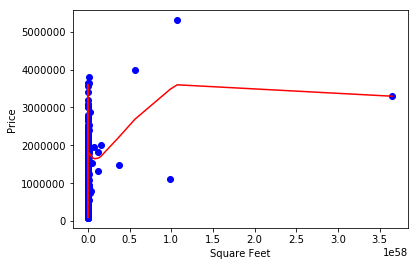

In [61]:
set_poly15_data(set_4,1e-9)

# Ridge regression comes to rescue
9. Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

10. Fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4, this time with a large L2 penalty. Make sure to add "alpha=l2_large_penalty" and "normalize=True" to the parameter list, where the value of l2_large_penalty is given by

        l2_large_penalty=1.23e2

Coefficients:  [  2.32806803e+00   3.53621608e-04   3.31969692e-08   2.00082477e-12
   1.11492559e-16   6.57786122e-21   4.12939525e-25   2.70393755e-29
   1.81614763e-33   1.23824277e-37   8.51872481e-42   5.89455598e-46
   4.09542560e-50   2.85464889e-54   1.99547476e-58]
Intercept:  539103.031058


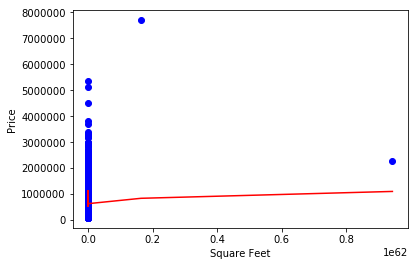

In [62]:
set_poly15_data(set_1,1.23e2)

Coefficients:  [  2.09756903e+00   3.90817483e-04   6.67189944e-08   8.90002997e-12
   9.72639877e-16   9.69733682e-20   9.50564475e-24   9.44491031e-28
   9.57191338e-32   9.86945155e-36   1.03101115e-39   1.08729784e-43
   1.15453748e-47   1.23211305e-51   1.31986696e-55]
Intercept:  529853.025358


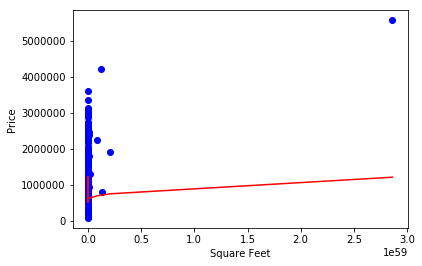

In [63]:
set_poly15_data(set_2,1.23e2)

Coefficients:  [  2.28906258e+00   4.12472190e-04   6.08835345e-08   6.58572163e-12
   6.15278155e-16   5.64446634e-20   5.28834396e-24   5.07091402e-28
   4.94657273e-32   4.88043809e-36   4.85009106e-40   4.84161534e-44
   4.84635021e-48   4.85883628e-52   4.87558469e-56]
Intercept:  533640.114097


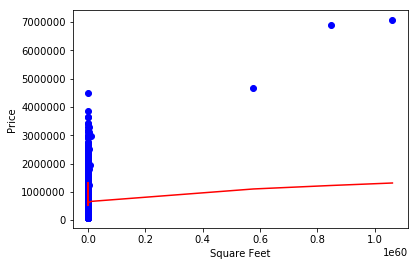

In [64]:
set_poly15_data(set_3,1.23e2)

Coefficients:  [  2.08596194e+00   4.05035772e-04   7.46864647e-08   1.13096608e-11
   1.45864442e-15   1.73561251e-19   2.01609632e-23   2.34605255e-27
   2.75636073e-31   3.27043069e-35   3.91046855e-39   4.70118041e-43
   5.67212304e-47   6.85958087e-51   8.30843630e-55]
Intercept:  524562.969047


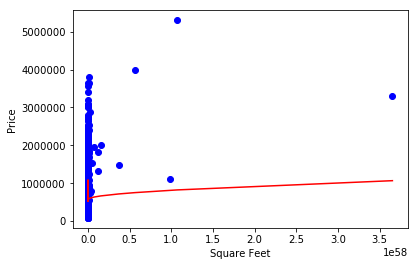

In [65]:
set_poly15_data(set_4,1.23e2)

# Selecting an L2 penalty via cross-validation
Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

* Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
* Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
* ...
* Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set


After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. We reserve 10% of the data as the test set and randomly shuffle the remainder. Le'ts call the shuffled data 'train_valid_shuffled'.

In [66]:
#download and read the csv file containing pre-shuffled wors of training and validation sets
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

Divide the combined training and validation set into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

In [67]:
#With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)//k
    end = (n*(i+1))//k-1
    print (i, (start, end))

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [68]:
train_valid_shuffled[0:10] # select rows 0 to 9

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4.0,2.50,2800.0,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580.0,5900.0
1,1703050500,20150321T000000,645000.0,3.0,2.50,2490.0,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710.0,6629.0
2,5700002325,20140605T000000,640000.0,3.0,1.75,2340.0,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360.0,4725.0
3,0475000510,20141118T000000,594000.0,3.0,1.00,1320.0,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700.0,5000.0
4,0844001052,20150128T000000,365000.0,4.0,2.50,1904.0,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560.0,12426.0
5,2781280290,20150427T000000,305000.0,3.0,2.50,1610.0,3516,2.0,0,0,...,8,1610,0,2006,0,98055,47.4491,-122.188,1610.0,3056.0
6,2214800630,20141105T000000,239950.0,3.0,2.25,1560.0,8280,2.0,0,0,...,7,1560,0,1979,0,98001,47.3393,-122.259,1920.0,8120.0
7,2114700540,20141021T000000,366000.0,3.0,2.50,1320.0,4320,1.0,0,0,...,6,660,660,1918,0,98106,47.5327,-122.347,1190.0,4200.0
8,2596400050,20140730T000000,375000.0,3.0,1.00,1960.0,7955,1.0,0,0,...,7,1260,700,1963,0,98177,47.7641,-122.364,1850.0,8219.0
9,4140900050,20150126T000000,440000.0,4.0,1.75,2180.0,10200,1.0,0,2,...,8,2000,180,1966,0,98028,47.7638,-122.270,2590.0,10445.0


In [69]:
start = (n*i)//10
end = (n*(i+1))//10
#train_valid_shuffled[start:end+1]

In [70]:
#train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])

Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe containing input features (e.g. poly15_data) and (iv) column of output values (e.g. price). The function returns the average validation error using k segments as validation sets. We shall assume that the input dataframe does not contain the output column.

For each i in [0, 1, ... k-1]:

* Compute starting and ending indices of segment i and call 'start' and 'end'
* Form validation set by taking a slice (start:end+1) from the data.
* Form training set by appending slice (end+1:n) to the end of slice (0:start).
* Train a linear model using training set just formed, with a given l2_penalty
* Compute validation error (RSS) using validation set just formed

In [71]:
def k_fold_cross_validation(k, l2_penalty, data, output, features_list):
    n = len(data)
    validation_error=0
    for i in range(k):
        start = (n*i)//k
        end = (n*(i+1))//k-1
        validation_set =data[start:(end+1)]
        training_set= data[0:start].append(data[end+1:n])
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(np.asanyarray(training_set[features_list]),
                  np.asanyarray(training_set[[output]]))
        y_hat = model.predict(np.asanyarray(validation_set[features_list]))
        validation_error += np.sum((y_hat-np.asanyarray(validation_set[[output]]))**2)
    
    average_validation_error = validation_error/k
        
    return average_validation_error

#train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:

* We will again be aiming to fit a 15th-order polynomial model using the sqft_living input
* For each l2_penalty in [10^3, 10^3.5, 10^4, 10^4.5, ..., 10^9] (to get this in Python, you can use this Numpy function: np.logspace(3, 9, num=13).): Run 10-fold cross-validation with l2_penalty.
* Report which L2 penalty produced the lowest average validation error.

In [72]:
#first generate polynomial features of the 15th order
poly_data = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
my_features = list(poly_data.columns)
poly_data['price'] = train_valid_shuffled['price']


#Write loop to find L2 penalty with the lowest average validation error
penalties = np.logspace(3,9, num=13)
for penalty in penalties:
    print("penalty: ", penalty, 
          "\nRSS: ", k_fold_cross_validation(10, penalty, poly_data, 'price', my_features))

penalty:  1000.0 
RSS:  2.64977361037e+14
penalty:  3162.27766017 
RSS:  2.65692935858e+14
penalty:  10000.0 
RSS:  2.65924368957e+14
penalty:  31622.7766017 
RSS:  2.65998081509e+14
penalty:  100000.0 
RSS:  2.66021444554e+14
penalty:  316227.766017 
RSS:  2.66028837919e+14
penalty:  1000000.0 
RSS:  2.66031176438e+14
penalty:  3162277.66017 
RSS:  2.66031915997e+14
penalty:  10000000.0 
RSS:  2.66032149871e+14
penalty:  31622776.6017 
RSS:  2.66032223829e+14
penalty:  100000000.0 
RSS:  2.66032247216e+14
penalty:  316227766.017 
RSS:  2.66032254612e+14
penalty:  1000000000.0 
RSS:  2.66032256951e+14


#### Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of l2_penalty. This way, your final model will be trained on the entire dataset.



In [73]:
#Using the best L2 penalty found above, train a model using all training data.
penalty = 10**3

train_data = polynomial_dataframe(sales['sqft_living'], 15) # use equivalent of `polynomial_dframe`
my_features = list(train_data.columns)
train_data['price'] = sales['price']

model = linear_model.Ridge(alpha=penalty, normalize=True)
model.fit(np.asanyarray(train_data[my_features]),
                  np.asanyarray(train_data[['price']]))

#What is the RSS on the TEST data of the model you learn with this L2 penalty?
test_data = polynomial_dataframe(test['sqft_living'], 15) # use equivalent of `polynomial_dframe`
t_features = list(test_data.columns)
test_data['price'] = test['price']

y_hat = model.predict(np.asanyarray(test_data[t_features]))
RSS = np.sum((y_hat-np.asanyarray(test_data[['price']]))**2)
RSS

283857157864605.0